# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

50,000 highly polarized review from the Internet movie database.  
25000 traing data, 25000 test data  
50% positive, 50% negative 

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) # only keep 10,000 most frequently occuriring word in the training data

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data]) # because we  restricited to the top 10000 most frequent words

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index() # word -> integer index 매핑 dictionary
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join( #.join -> list를 문자열로 
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
# indices are offset by 3 because 0,1,2 are "padding","start of sequence", "unknown"

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식입니다. 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 합니다.

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

2 intermediate layers with 16 units each  
3rd layer will output the scalar prediction regarding the sentiment of the curruent revies


**Model definition**

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), # 중간 계층 -> relu 함수 사용(음수를 0으로 만드는 함수)
    layers.Dense(16, activation="relu"), 
    layers.Dense(1, activation="sigmoid") # 임의의 값을 [0,1] interval로 나타냄 (1을 가질 가능성)
])

more unit(a higher-dimensional representation spae) -> 더 복잡한 표현을 학습할 수 있으나, overfit 될 수 있다. 

**Compiling the model**

- loss choice : binary classification, output of you model is a probability(single unnit layer with a sigmoid activation)   
  -> **binary cossentropy loss** is best chois 
- optimizer choice : rmsprob is usually good defalt choice 

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000] # train data 중 10000개를 validation data에 할당 
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5268 - accuracy: 0.7797 - val_loss: 0.3998 - val_accuracy: 0.8694
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3224 - accuracy: 0.8985 - val_loss: 0.3151 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2369 - accuracy: 0.9247 - val_loss: 0.2839 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1865 - accuracy: 0.9424 - val_loss: 0.2769 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1521 - accuracy: 0.9521 - val_loss: 0.2949 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1254 - accuracy: 0.9623 - val_loss: 0.2923 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1049 - accuracy: 0.9694 - val_loss: 0.3030 - val_accuracy: 0.8837
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

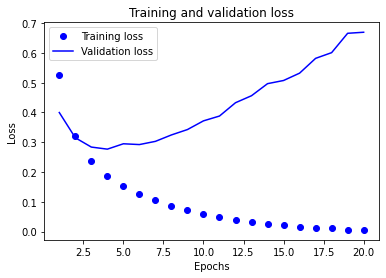

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

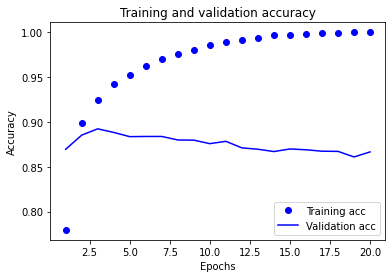

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

약 4 epochs 이후로는 loss가 커지고 accuracy가 줄어듦
-> 4 epochs까지만 진행 

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4843 - accuracy: 0.8181
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2736 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2065 - accuracy: 0.9256
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.8850


In [ ]:
results #test loss, accuracy

[0.29411429166793823, 0.8850399851799011]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

# 일부 표본의 경우 모델이 신뢰 가능하지만(0.99 이상, 0.01이하), 다른 표본(0.6,0.4)의 경우 신뢰도가 낮다 

array([[0.22858968],
       [0.9999449 ],
       [0.9672936 ],
       ...,
       [0.161401  ],
       [0.09347045],
       [0.82443804]], dtype=float32)

### Further experiments

- 최종 분류 전 2개의 layor 사용 -> 1개 또는 3개의 layor 사용해보기
- 더 많거나 적은 units 사용해보기
- binary crossentropy 대신 mse사용해보기
- relu 대신 tanh 활성화함수 사용해보기 

### Wrapping up

## Classifying newswires: A multiclass classification example

- singlelabel multiclass classification : 하나의 data는 한 class에만 속함
- multilabel multiclass classification : 하나의 data가 여러 class에 속함

### The Reuters dataset

reuters가 출간한 짧은 뉴스 와이어  
46개의 토픽이 있으며, 각 토픽에 10개 이상의 example을 가지고 있음

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [15]:
# one hot encoding (keras 내장)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"), # 조금 더 큰 층을 사용하자! 16차원 공간으로는 46차원 클래스를 구분하기에 너무 작음 
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") # softmax함수의 output[i]은 i에 속할 prob며, 46개의 값을 모두 더하면 1이 된다 
])

**Compiling the model**

In [20]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #  두 확률 분포 사이의 거리를 측정하는 loss function.
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.7331 - accuracy: 0.5247 - val_loss: 1.8661 - val_accuracy: 0.6360
Epoch 2/20
16/16 [==============================] - 1s 52ms/step - loss: 1.4837 - accuracy: 0.7035 - val_loss: 1.3390 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0751 - accuracy: 0.7795 - val_loss: 1.1495 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8368 - accuracy: 0.8281 - val_loss: 1.0556 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6637 - accuracy: 0.8624 - val_loss: 0.9694 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5314 - accuracy: 0.8908 - val_loss: 0.9372 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4217 - accuracy: 0.9131 - val_loss: 0.8984 - val_accuracy: 0.8110
Epoch 8/20
16

**Plotting the training and validation loss**

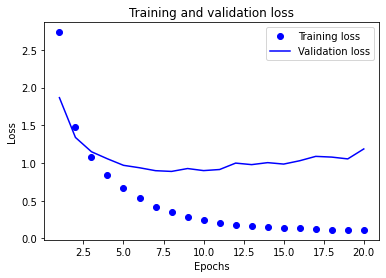

In [25]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

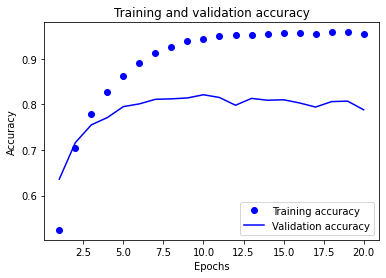

In [26]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

epochs = 9 정도에서 오버피팅이 발생한다.

**Retraining a model from scratch**

In [27]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 44ms/step - loss: 2.4905 - accuracy: 0.4774
Epoch 2/9
18/18 [==============================] - 1s 43ms/step - loss: 1.3528 - accuracy: 0.7145
Epoch 3/9
18/18 [==============================] - 1s 44ms/step - loss: 1.0050 - accuracy: 0.7841
Epoch 4/9
18/18 [==============================] - 1s 44ms/step - loss: 0.7854 - accuracy: 0.8292
Epoch 5/9
18/18 [==============================] - 1s 43ms/step - loss: 0.6238 - accuracy: 0.8674
Epoch 6/9
18/18 [==============================] - 1s 43ms/step - loss: 0.4960 - accuracy: 0.8952
Epoch 7/9
18/18 [==============================] - 1s 44ms/step - loss: 0.3972 - accuracy: 0.9162
Epoch 8/9
18/18 [==============================] - 1s 43ms/step - loss: 0.3249 - accuracy: 0.9292
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9738 - accuracy: 0.7850


In [28]:
results # 약 78%의 정확도

[0.973783016204834, 0.7849510312080383]

In [29]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()
# 이건 뭘까....................................................................???

0.18833481745325023

### Generating predictions on new data

In [30]:
predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [38]:
predictions[0]

array([6.78879906e-06, 5.03536321e-05, 2.03105174e-06, 9.16004002e-01,
       8.01233575e-02, 1.99025635e-06, 7.78363483e-06, 3.07450573e-05,
       7.22226163e-04, 4.94765686e-07, 5.19944042e-05, 2.58993299e-04,
       7.64691067e-05, 8.53158417e-05, 2.22782219e-05, 2.37533859e-05,
       5.29270736e-04, 1.20836550e-04, 2.56715848e-05, 5.20560483e-04,
       2.72248610e-04, 3.77403107e-04, 1.01483856e-05, 1.10872425e-04,
       4.36205710e-06, 2.72916295e-05, 2.81941129e-06, 3.40042316e-05,
       2.68721506e-05, 8.38007982e-05, 2.07360208e-05, 3.40782462e-05,
       2.03549334e-05, 4.08385768e-06, 1.96981655e-05, 9.27697693e-06,
       1.43052948e-05, 1.79983181e-05, 6.07085076e-06, 6.57340424e-05,
       8.55945109e-06, 1.47025188e-04, 7.34358935e-07, 1.41089731e-05,
       2.20628863e-06, 2.75952488e-07], dtype=float32)

In [32]:
np.sum(predictions[0])

1.0

In [39]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [40]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [41]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [42]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", 
# categorical crossentropy는 레이블이 범주형 인코딩일 때 -> 정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 3.0788 - accuracy: 0.0873 - val_loss: 2.3693 - val_accuracy: 0.3000
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.8819 - accuracy: 0.5173 - val_loss: 1.6085 - val_accuracy: 0.6550
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3610 - accuracy: 0.6740 - val_loss: 1.4366 - val_accuracy: 0.6550
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1712 - accuracy: 0.6963 - val_loss: 1.3801 - val_accuracy: 0.6710
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0438 - accuracy: 0.7296 - val_loss: 1.3421 - val_accuracy: 0.6820
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9401 - accuracy: 0.7750 - val_loss: 1.3363 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.8520 - accuracy: 0.7934 - val_loss: 1.3570 - val_accuracy: 0.7000
Epoch 8/20
63

### Further experiments

- 최종 분류 전 2개의 layor 사용 -> 1개 또는 3개의 layor 사용해보기
- 더 많거나 적은 units 사용해보기

### Wrapping up

## Predicting house prices: A regression example

* regression : 예측 <-> logistic regression ; 분류

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [43]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [55]:
train_data.shape

(404, 13)

In [45]:
test_data.shape

(102, 13)

In [54]:
train_targets # 주택의 중간 가격, 1000$ 단위

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

different scale -> nomalizing 필요

In [56]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
# 반드시 train data의 mean과 std를 사용해 정규화 

### Building your model

**Model definition**

In [59]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"), # small trainign data -> overfitting 확률 높음 -> 작은 model
        layers.Dense(64, activation="relu"),
        layers.Dense(1) # linear layor, scalar unit을 위한 구성 
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # loss = mse : 회귀 문제에서 널리 사용됨 / matrics = mean absolute error : 예측과 타깃 사이의 절댓값
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [60]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [61]:
all_scores

[2.2002570629119873, 2.4157137870788574, 2.393690586090088, 2.42057204246521]

In [62]:
np.mean(all_scores)

2.3575583696365356

**Saving the validation logs at each fold**

ephochs을 500으로 늘려 훈련

In [63]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [64]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

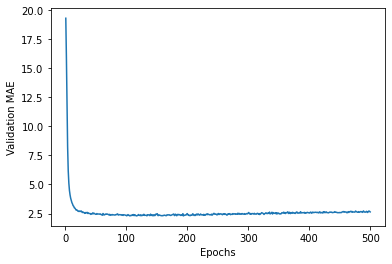

In [65]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

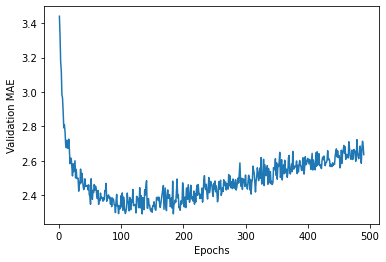

In [66]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [67]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 14.9999 - mae: 2.5456


In [68]:
test_mae_score

2.545637607574463

### Generating predictions on new data

In [69]:
predictions = model.predict(test_data)
predictions[0]

array([8.024035], dtype=float32)

### Wrapping up